In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df=pd.read_excel("Online retail.xlsx",header=None)
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


In [ ]:
df.shape

(7501, 1)

In [ ]:
df.isnull().sum()

,0
0,0


In [ ]:
df.duplicated().sum()

np.int64(2325)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='0'>

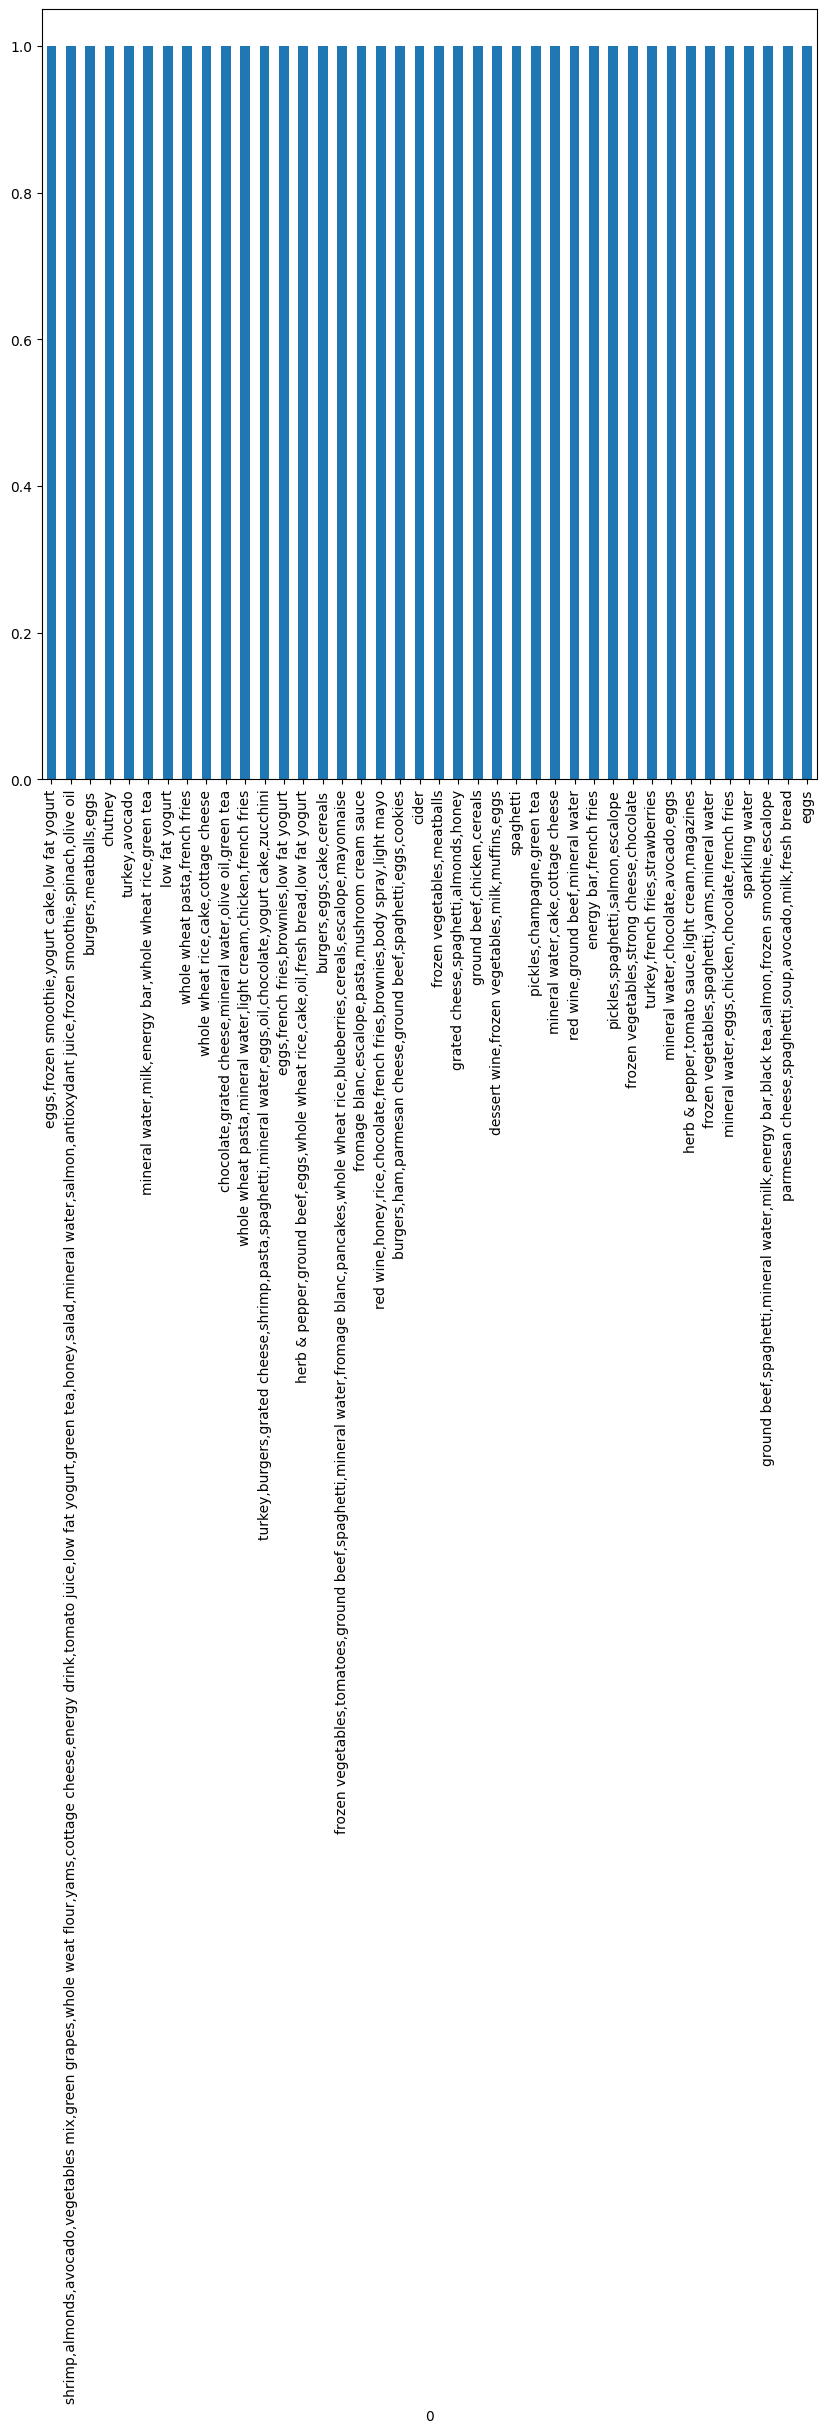

In [ ]:
plt.figure(figsize=(10,10))
df[0].value_counts().head(40).plot(kind='bar')

In [ ]:
transactions = []
for i in range(len(df)):
  # Split the comma-separated string into individual items and strip whitespace
  items = [item.strip() for item in str(df.values[i,0]).split(',')]
  transactions.append(items)

In [ ]:
len(transactions)

5176

In [ ]:
items1=[items for trans in transactions for items in trans]
items2=list(set(items1))
len(items2)
print(items2)

['tomatoes,pepper,mineral water', 'mineral water,avocado,muffins,champagne,cookies,body spray', 'burgers,champagne,fresh bread', 'grated cheese,chocolate,escalope', 'mineral water,fromage blanc,french fries,body spray,pancakes,energy drink,green tea', 'mineral water,cooking oil', 'honey,cookies', 'avocado,black tea,eggs', 'mineral water,meatballs,chicken,frozen smoothie', 'turkey,shrimp,frozen vegetables,mineral water,honey,strawberries', 'soup,clothes accessories,escalope', 'burgers,dessert wine,strong cheese,french fries', 'fresh tuna,parmesan cheese,fresh bread', 'tomatoes,spaghetti,olive oil,almonds,eggs', 'mineral water,whole wheat rice', 'grated cheese,tomatoes,spaghetti,mineral water,milk,ketchup,carrots,french fries,protein bar', 'cottage cheese,protein bar', 'turkey,fresh tuna,shrimp,spaghetti', 'pepper,spaghetti,light cream', 'parmesan cheese,spaghetti,green grapes', 'parmesan cheese,ground beef', 'chocolate,ground beef,mineral water', 'mineral water,cake,frozen smoothie,cook

In [ ]:
one_hot=TransactionEncoder().fit(transactions)
data=one_hot.transform(transactions)
data1=pd.DataFrame(data,columns=one_hot.columns_)
data1.shape

(5176, 119)

In [ ]:
frequent_itemsets = apriori(data1, min_support=0.01,max_len=2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.029366,(almonds)
1,0.011206,(antioxydant juice)
2,0.045981,(avocado)
3,0.012558,(bacon)
4,0.015456,(barbecue sauce)
...,...,...
367,0.029946,"(tomatoes, spaghetti)"
368,0.023764,"(spaghetti, turkey)"
369,0.012365,"(spaghetti, whole wheat pasta)"
370,0.020286,"(spaghetti, whole wheat rice)"


In [ ]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=.20)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(almonds),(mineral water),0.029366,0.299845,0.011012,0.375000,1.250644,1.0,0.002207,1.120247,0.206476,0.034608,0.107340,0.205863
1,(avocado),(chocolate),0.045981,0.205178,0.010240,0.222689,1.085347,1.0,0.000805,1.022528,0.082426,0.042502,0.022032,0.136297
2,(avocado),(french fries),0.045981,0.192620,0.011592,0.252101,1.308800,1.0,0.002735,1.079531,0.247313,0.051064,0.073672,0.156141
3,(avocado),(milk),0.045981,0.170015,0.010819,0.235294,1.383957,1.0,0.003002,1.085364,0.290806,0.052731,0.078650,0.149465
4,(avocado),(mineral water),0.045981,0.299845,0.016036,0.348739,1.163064,1.0,0.002248,1.075076,0.146960,0.048623,0.069833,0.201109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,(tomato juice),(spaghetti),0.042311,0.229521,0.010819,0.255708,1.114094,1.0,0.001108,1.035184,0.106934,0.041451,0.033988,0.151423
185,(tomatoes),(spaghetti),0.091963,0.229521,0.029946,0.325630,1.418739,1.0,0.008838,1.142517,0.325040,0.102717,0.124740,0.228051
186,(turkey),(spaghetti),0.083269,0.229521,0.023764,0.285383,1.243385,1.0,0.004652,1.078170,0.213524,0.082219,0.072503,0.194459
187,(whole wheat pasta),(spaghetti),0.040572,0.229521,0.012365,0.304762,1.327818,1.0,0.003053,1.108223,0.257325,0.047976,0.097655,0.179317


**After applying apriori algorithm the dataset is empty**

**1.What is lift and why is it important in Association rules?**

Lift is a metric used in association rule mining to measure how much more likely two items are to occur together than would be expected if they were independent.
Lift helps identify strong and meaningful associations between items. Unlike confidence, it adjusts for the base frequency of items, allowing better evaluation of rule usefulness.

**2.What is support and Confidence. How do you calculate them?**

In association rule mining, support and confidence are key measures to evaluate the strength of relationships between items.

**Support tells us how often a combination of items appears together in the dataset. It shows the popularity or frequency of an itemset.
**Confidence measures how often items in B appear in transactions that contain A. Confidence tells us how likely one item is to be bought when another is bought. It measures the reliability of the rule.

**3.What are some limitations or challenges of Association rules mining?**

Some key limitations or challenges of association rule mining include:

Large number of rules: It can generate thousands of rules, many of which are redundant or insignificant, making interpretation difficult.

Choice of thresholds: Selecting appropriate minimum support and confidence values is tricky — too high may miss useful rules, too low may produce too many.

Lack of causality: Association rules show correlations, not cause-and-effect relationships.

Association rule mining faces several challenges. It can produce a very large number of rules, making it hard to find the most useful ones.The rules may not always make sense without understanding the real-world context.